# [Global 88] Gender Violence in India

#### Professor: Karenjot Bhangoo Randhawa

**Estimated Time:** *55 minutes*  
**Notebook Created By:** Bella Chang, Emily Guo, Carlos Calderon  
**Code Maintenance:** Carlos Calderon

Welcome! Last week we got an introduction to Jupyter, Python, and table operations. Specifically, we reviewed the table methods: `show()`, `select()`, and `sort()`. We also looked at the table properties: `tbl.num_columns`, `tbl.num_rows`, and `tbl.labels`. This week we will go over what types of data exist in the world, and what visualizations we can conduct. For this, we will be using the `matplotlib` library. 


Throughout the course of this notebook you will be using data science techniques and concepts to assess different measures of gender-related violence in India. Data analysis allows us to summarize and understand any trends found in our data. The main purpose of this notebook is to determine any trends in gender-related violence in India found after [the Criminal Law (Amendment) Act 2013](https://www.iitk.ac.in/wc/data/TheCriminalLaw.pdf). Specifically, we'd like to assess whether this legislation had any effect on gender-related violence accross India, and if so, what were those effects?  

**Learning Outcomes**  

By the end of this notebook, students will be able to: 
1. How to work with Jupyter Notebooks and conduct basic data exploration on gender violence on a local case study in India.
2. Learn about basic data literacy, including misuse of statistics, intentional and unintentional.
3. Learn about ethical challenges and making decision about research efficacy and validity.

# Table of Contents

1. [Introduction to Jupyter](#Intro)  
    1.1 [The Code Cell](#code)  
    1.2 [Getting Started](#started)
2. [Introduction to Python](#python)  
    2.1 [Print Statements](#print)  
    2.2 [Variables](#vars)  
    2.3 [Tables](#tables)
3. [Introduction to the Data](#data)  
    3.1 [Background to Data & Data Importing](#background)  
    3.2 [Features of our Data](#feature)
4. [City Analysis](#city)  
    4.1 [Crime Rate Throught Time](#crimerate)  
    4.2 [Population as a Predictor of Crime](#popcrime)  
    4.3 [Mapping Crime Rates](#citymap)
5. [State/Union Territory Analysis](#state)  
    5.1 [Crime Rate Throughout Time](#risingcrime)  
    5.2 [Crime Rate Throughout Time Accross States/UTs](#statettime)   
    5.3 [Relationships](#relationships)   
    5.4 [Mapping Crime Rates](#statemap)  
6. [Data Science Resources](#resources)

<a id='Intro'></a>

<a id="started"></a>

### 1.2 Getting Started
In data science, we are able to manipulate our data using Python *libraries*, which are basically big collections of commands we can use based off of the coding language Python. We have imported some below so that we can easily visualize and analyze our data later on.

In [47]:
# Don't change this cell; just run it. 
#import numpy as np
#from datascience import *
#import pandas as pd

# These lines do some fancy plotting magic
#import plotly.express as px 

#import matplotlib

#from ipywidgets import interact
#import ipywidgets as widgets
#from IPython.display import HTML

#import folium
#import geopandas as gpd

from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plt
import bokeh
plt.style.use('fivethirtyeight')
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline

These libraries differ in the sense that some of them are aimed for visualization, some better suited for statistics, and some are better suited for other purposes! The point is that we want to import all of these different tools for ourselves so that we can have it ready when we are dealing with our data later on.

----

<a id="data"></a>

# 1. Types of Data

<a id="background"></a>

## 1.1 Background to Data & Data Importing  
Our data comes from the [National Crime Records Bureau of India](https://ncrb.gov.in/en) which was set up in 1986 to "function as a repository of information on crime and criminals so as to assist the investigators in linking crime to the perpetrators." For the purpose of this analysis, we deal with two datasets: [one pertaining to crime in cities in India](https://ncrb.gov.in/sites/default/files/crime_in_india_table_additional_table_chapter_reports/Table%203B.1_3.pdf) and [another pertaining to crime across Indian states/union territories](https://ncrb.gov.in/sites/default/files/crime_in_india_table_additional_table_chapter_reports/Table%203A.1_0.pdf).  

Both of these datasets look at crimes in India between the years of 2017-2019 as well as at specific factors (population, total crime against women) that will be useful in trying to make inferences about gender-based violence in certain areas in India.  


*Note: In the Indian numbering system, a ***lakh*** is equal to 100,000. Moreover, politically, a *union territory* is a small administrative unit like a state, but while states are self-governed, union territories are directly ruled over by the central or union government. [Feel to read more here](https://www.indiatoday.in/education-today/gk-current-affairs/story/what-is-the-difference-between-a-state-and-an-union-territory-1577445-2019-08-05!)*

Here is our **state & union territory based dataset**. 

In [100]:
# When we reference this table later, notice that we can just call the variable states!
url = "https://raw.githubusercontent.com/cxrlsc/data/master/global-fa21/State%20Data.csv"
states = Table.read_table(url)
states.show(10)

State/UT,2017 Crimes,2018 Crimes,2019 Crimes,Percentage State Share to Total (2019),Mid-Year Projected Female Population (in lakhs) (2019),Rate of Total Crime Against Women (2019),2018-2019 GDP Per Capita ($),2018-2019 Unemployment Rate (%),2021 Literacy Rate (%)
Andhra Pradesh,17909,16438,17746,4.4,261.4,67.9,2480,7.3,67.02
Arunachal Pradesh,337,368,317,0.1,7.3,43.3,2253,11.1,65.38
Assam,23082,27687,30025,7.4,168.9,177.8,1365,10.7,72.19
Bihar,14711,16920,18587,4.6,576.2,32.3,659,10.5,61.8
Chhattisgarh,7996,8587,7689,1.9,143.8,53.5,1555,5.5,70.28
Goa,369,362,329,0.1,7.6,43.1,7029,9.1,88.7
Gujarat,8133,8329,8799,2.2,324.9,27.1,3283,3.2,78.03
Haryana,11370,14326,14683,3.6,135.3,108.5,3840,8.7,75.55
Himachal Pradesh,1246,1633,1636,0.4,36.1,45.4,3118,8.8,82.8
Jammu & Kashmir,3129,3437,3069,0.8,64.2,47.8,1636,10.1,67.16


To understand our dataset more carefully, we need to understand what each column (or variable) is trying to describe:

| Column (Variable) Name                                 | Description                                                              |
|--------------------------------------------------------|--------------------------------------------------------------------------|
| State/UT                                               | Name of state/union territory                                            |
| 2017 Crimes                                            | Number of crimes (per lakh) against women in 2017                        |
| 2018 Crimes                                            | Number of crimes (per lakh) against women in 2018                        |
| 2019 Crimes                                            | Number of crimes (per lakh) against women in 2019                        |
| Percentage State Share to Total (2019)                 | Percentage of crimes (out of 100) accounted for by this state/UT in 2019 |
| Mid-Year Projected Female Population (in lakhs) (2019) | Projected population for this state/UT in June 2019                      |
| Rate of Total Crime Against Women (2019)               | Average number of crimes for every 100,000 women in this state/UT        |
| 2018-2019 GDP Per Capita ($)                           | GDP per capita for this state/UT, measured in USD                        |
| 2018-2019 Unemployment Rate (%)                        | Unemployment rate in this state/UT in 2018-2019                          |
| 2021 Literacy Rate (%)                                 | Literacy rate in this state/UT in 2021                                   |

Here is our **city based dataset**.

In [174]:
# Again, we can reference this city table later using just the variable cities.
url = "https://raw.githubusercontent.com/cxrlsc/data/master/global-fa21/Table%203B.1_3.csv"
cities = Table.read_table(url)
cities.relabel(['2017', '2018', '2019','Rate of Total Crime Against Women\n(2019)+'],
               ['2017 Crimes', '2018 Crimes', '2019 Crimes', 'Rate of Total Crime Against Women (2019)'])
city_arr = ['Ahmedabad', 'Bengaluru', 'Chennai', 'Coimbatore', 'Delhi', 'Ghaziabad', 'Hyderabad',
            'Indore', 'Jaipur', 'Kanpur', 'Kochi', 'Kolkata', 'Kozhikode', 'Lucknow', 'Mumbai',
            'Nagpur', 'Patna', 'Pune', 'Surat']
cities['City'] = city_arr
cities.show(3)

City,2017 Crimes,2018 Crimes,2019 Crimes,Percentage City Share to Total (2019),Actual Population (in Lakhs) (2011),Rate of Total Crime Against Women (2019)
Ahmedabad,1405,1416,1633,3.6,30,54.4
Bengaluru,3565,3427,3486,7.7,40.6,85.9
Chennai,642,761,729,1.6,43.1,16.9


And here is a description of each column in the city dataset:  

| Column (Variable) Name                    | Description                                                          |
|-------------------------------------------|----------------------------------------------------------------------|
| City                                      | Name of city                                                         |
| 2017 Crimes                               | Number of crimes (per lakh) against women in 2017                    |
| 2018 Crimes                               | Number of crimes (per lakh) against women in 2018                    |
| 2019 Crimes                               | Number of crimes (per lakh) against women in 2019                    |
| Percentage State Share to Total (2019)    | Percentage of crimes (out of 100) accounted for by this city in 2019 |
| Actual Population (in Lakhs) (2011)       | Population for this city in 2011                                    |
| Rate of Total Crime Against Women (2019)  | Average number of crimes for every 100,000 women in this city        |

## 1.2 Categorical (Qualitative) Data  
Categorical data are data that are observed and described, and can be stored and identified based on its labels. These data are categorized based on some set of properties, attributes, or some sort of labeling system. There are two types of categorical data: (a) Nominal and (b) Ordinal. Categorical data can be visualized using **bar plots** and can be summarized with counts or percentages. 

### 1.2.1 Nominal Data  
You can think of nominal data as naming data. These labels have no inherent ordering (ranking) system and are usually nouns. Some examples of nominal data are: 
- Gender 
- Name 

In [175]:
cities.show(2)

City,2017 Crimes,2018 Crimes,2019 Crimes,Percentage City Share to Total (2019),Actual Population (in Lakhs) (2011),Rate of Total Crime Against Women (2019)
Ahmedabad,1405,1416,1633,3.6,30,54.4
Bengaluru,3565,3427,3486,7.7,40.6,85.9


<div class="alert alert-info">
    <b>Question 1.1</b> Looking at our <code>cities</code> dataset above, what are examples of nominal data?
</div>

*Replace this text with your response!*

### 1.2.2 Ordinal Data 
These data types are also labels, but differ from nominal data in that the labels possess an inherent ordering. Unlike nominal data, they are not always nouns and may even take the form of numbers. Some examples of ordinal data are: 
- Satisfaction (Likert) scale (Rate how satisfied you were from 1-5)
- Star review rating systems

## 1.3 Numerical (Quantitative) Data  
Numerical data is any data that is measured using numbers, as such, many mathematical operations can be used to derive insights from it. Quantities such as the average, the mode, and the standard deviation are all values that can be obtained only from numerical data. There are two types of numerical data (a) Discrete and (b) Continuous. Numerical data can be visualized through **histograms, box plots, line plots, scatter plots**.

### 1.3.1 Discrete (Ratio) Data 
Discrete data is numerical data that represents countable items, as such, it is always represented by an integer (no decimal numbers). Some examples of discrete data are: 
- The number of students in a class 
- Outcome of rolling a dice 

In [176]:
states.show(2)

State/UT,2017 Crimes,2018 Crimes,2019 Crimes,Percentage State Share to Total (2019),Mid-Year Projected Female Population (in lakhs) (2019),Rate of Total Crime Against Women (2019),2018-2019 GDP Per Capita ($),2018-2019 Unemployment Rate (%),2021 Literacy Rate (%)
Andhra Pradesh,17909,16438,17746,4.4,261.4,67.9,2480,7.3,67.02
Arunachal Pradesh,337,368,317,0.1,7.3,43.3,2253,11.1,65.38


<div class="alert alert-info">
    <b>Question 1.2</b> Looking at our <code>states</code> dataset above, what are examples of discrete data?
</div>

**Hint**: Look for numerical data represented by whole numbers. 

*Replace this text with your answer!*

### 1.3.2 Continuous (Interval) Data
Continuous data are numerical data that convey some form of measurement that cannot be represented by an integer. As a result, continuous data is usually easy to identify because it contains decimal point values. Some examples of continous data are: 
- Miles per gallon
- Weight 
- Height

In [177]:
cities.show(2)

City,2017 Crimes,2018 Crimes,2019 Crimes,Percentage City Share to Total (2019),Actual Population (in Lakhs) (2011),Rate of Total Crime Against Women (2019)
Ahmedabad,1405,1416,1633,3.6,30,54.4
Bengaluru,3565,3427,3486,7.7,40.6,85.9


<div class="alert alert-info">
    <b>Question 1.3</b> Looking at our <code>cities</code> dataset above, what are examples of continuous data?
</div>

*Replace this text with your response!*

<a id="feature"></a>

----

<a id="city"></a>

# 2. Data Visualizations

Now that we have gone over the 4 basic types of data we will encounter, we can start looking at how to visualize these data. Visualizations are a great visual aid that can guide us in discovering and displaying patterns in our data. Before you start, it is important to note that every data visualization you see and will produce in the future must have:
- **Main Title:** Should be representative of what the graph is showing 
- **Labeled Axes:** Guide the reader in understanding what is being graphed. 

Although there are many more guidelines to follow when visualizing data, these two are particularly important for **all** graphs and should be considered rules of thumb.

### 2.1 Histograms - One Numerical Variable  

For a  numerical variable (discrete or continous), a **histogram**  is the most common visualization. A histogram is helpful in visualizing the distribution, or frequency, of values within some feature. 

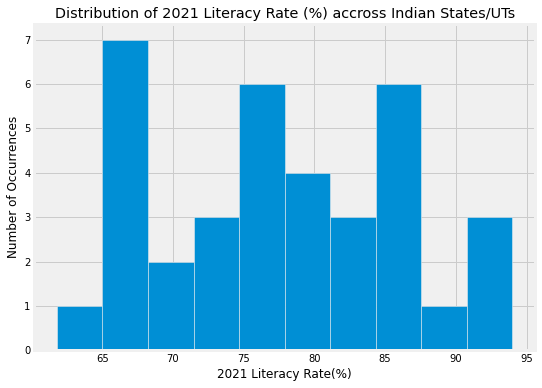

In [178]:
col = '2021 Literacy Rate (%)'
plt.figure(figsize=(8, 6))
plt.hist(col, data=states, bins=10)
plt.title('Distribution of '+ col + ' accross Indian States/UTs')
plt.xlabel("2021 Literacy Rate(%)")
plt.ylabel("Number of Occurrences");

Above, we have used our `states` dataset to visualize the distribution of 2021 literacy rates (measured as percentages) accross Indian States and Union Territories. How do we interpret this? Looking at our x-axis, we can see that it plots the 2021 literacy rates, whilst the y-axis, plots the frequency, or number of occurrences, for each literacy rate range.  

An example of an insight we can derive from this is that the most commonly seen literacy rate ranges between 65 and 70. This means that most of the states within our dataset have a literacy rate between 65-70%. Similarly, we can see that there are no states with a literacy rate of 95% or higher. 

Run the cell below, which will plot a histogram using the `states` dataset. You can select which column you'd like to visualize by selecting from the dropdown menu. Make sure that the column you visualize is the correct data type for this visualization. 

In [179]:
def plot_histogram_states(column):
    plt.figure(figsize=(8, 6))
    plt.hist(column, data=states)
    plt.title('Distribution of '+ column + ' accross Indian States/UTs')
    plt.xlabel(column)
    plt.ylabel("Number of Occurrences");

col_names = list(states.labels)

col_widget = widgets.Dropdown(options=col_names, 
                              value=col_names[1])

interact(plot_histogram_states,  
         column=col_widget);

interactive(children=(Dropdown(description='column', index=1, options=('State/UT', '2017 Crimes', '2018 Crimes…

<div class="alert alert-info">
    <b>Question 2.1</b> What column did you select? What did you learn? What was the takeaway? How does this inform us about our dataset as whole? 
</div> 

*I selected the column:* _______  

*One takeaway I found is that:* _____

Now that you have gotten a taste of how histograms look and how to interpret them, we can start looking at the code needed to generate one. To make a histogram, we use the `plt.hist()` function. There are many arguments we can specify (color, outline, etc.), but for the purposes of today we will be looking at two main arguments. 
- **`x`**: The name of the column (variable) we want to visualize 
- **`data=`**: Assigned to the name of the dataset we want to pull information from  

Now, remember that in the beginning of the section we stated that every visualization must have a title and labeled axes. This can be done with the following functions: 
- `plt.title('Table 1')`: Assigns the title "Table 1" to the visualization
- `plt.xlabel('Label X')`: Assings "Label X" to the x-axis
- `plt.ylabel('Label Y')`: Assigns "Label Y" to the y-axis  

**Note:** Make sure to add the title and axes labeling code ***after*** your main plot code. 

So far, we have been generating histograms from the `states` dataset. Let's pivot now and use the `cities` dataset. 

<div class="alert alert-info">
    <b>Question 2.2</b> Use the <code>plt.hist()</code> function, and the <code>cities</code> dataset to visualize the distribution of crime rates against women in 2019 accross Indian cities. Then, assign <code>my_title</code>, and <code>x_axis_label</code> to labels that accurately represent the values visualized.
</div> 

In [ ]:
# Fill in the ... with your code!
plt.figure(figsize=(8, 6))

plt.hist(x="...", data=...) # Remember, x is the column we want to visualize. Data is the name of the dataset we want to use

my_title = "..." # This will be the main title of your graph
x_axis_label = "..." # This will the label for your x-axis

plt.title(my_title)
plt.xlabel(x_axis_label)
plt.ylabel("Number of occurrences");

<div class="alert alert-block alert-success">
<b>Bonus Question 1:</b> Write down code below to create a histogram of the number crimes in 2019 accross Indian cities. What do you notice?
</div>

In [ ]:
plt.figure(figsize=(8,6))

...
...
...
...

*Replace this text with your answer*

## 2.2 Scatter Plots - Numeric x Numeric 
The next type of graph we will look at is the **scatter plot**. This type of graph is useful when you are interested in analyzing the interactions and relationships between two numerical variables in our dataset. More importantly, scatter plots allow us to visualize the concept of **correlation**. 

When working as data scientists, [correlation](https://en.wikipedia.org/wiki/Correlation) is one of the most important concepts to grasp. It is used to describe the strength of an association between two variables. So while a scatter plot *shows* us the relationship between two variables, correlation *numerically describes* the strength and direction of that relationship. 

An important value to understand is the correlation coefficient **r**, which is always a number between -1 and 1. Correlation coefficient values closer to 0 tell us that two variables have no association. On the contrary, correlation coefficient values closer to -1 or 1 tell us that two variables are *highly correlated*, meaning they are both heavily associated with one another. Notice how this does not tell us whether two variables are related by cause an effect. This is because **correlation is not causation**.

For the following section, you will see and create a series of scatter plots, and also view their correlation coefficient. [Using the following link as a guide, interpret the correlation coefficients and the scatterplot between two variables for the following questions.](https://www.scribbr.com/statistics/correlation-coefficient/)

Correlation coefficient = 0.44422359186055715


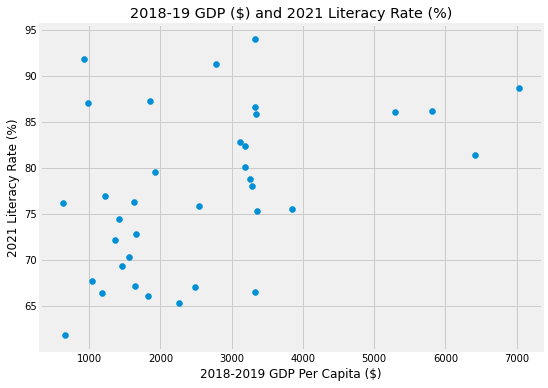

In [181]:
plt.figure(figsize=(8,6))

x_column = "2018-2019 GDP Per Capita ($)"
y_column = "2021 Literacy Rate (%)"

plt.scatter(x=x_column, y=y_column, data=states)
plt.title("2018-19 GDP ($) and 2021 Literacy Rate (%)")
plt.xlabel(x_column)
plt.ylabel(y_column);

print("Correlation coefficient =", np.corrcoef(states[x_column], states[y_column])[0, 1])

Here we can see that each point represents a row in our dataset. The y-axis represents the 2021 literacy rates, and the x-axis the GDP values per capita. We also see a correlation coefficient of $\approx 0.44$. How do we piece this together? Since our correlation coefficient is positive, literacy rate and GDP exhibit a positive relationship with one another. That is, states with higher GDP are associated with higher literacy rates. Do you see this being represented by the scatter plot?  

Run the cell below, which plots the scatter plot between two variables of your choice. Use the dropdown menus to make your choices. Make sure that you choose columns that represent *numerical variables*. 

In [182]:
def scatter_plot(x_column, y_column):
    plt.figure(figsize=(8,6))
    
    plt.scatter(x=x_column, y=y_column, data=states)
    plt.title(x_column +  " and " + y_column)
    plt.xlabel(x_column)
    plt.ylabel(y_column);

    print("Correlation coefficient =", np.corrcoef(states[x_column], states[y_column])[0, 1])


col_names = list(states.labels)

col_widget = widgets.Dropdown(options=col_names, 
                              value=col_names[1])
other_col_widget = widgets.Dropdown(options=col_names, 
                                   value=col_names[2])

interact(scatter_plot,  
         x_column=col_widget, 
         y_column=other_col_widget);

interactive(children=(Dropdown(description='x_column', index=1, options=('State/UT', '2017 Crimes', '2018 Crim…

<div class="alert alert-info">
    <b>Question 2.3</b> What variables did you select? What did you learn? What was the correlation coefficient value? What does this tell us about the relationship between these two variables?
</div> 

*Variable 1:* ____ 

*Variable 2:* ____  

*Correlation Coefficient =* ____  

*What does this tell you about the relationship between the two variables?* _______

Now that you have gotten a taste of how scatter plots look and how to interpret them in conjunction with the correlation coefficient, we can start looking at the code needed to generate these. To make a scatter plot, we use the `plt.scatter()` function. There are many arguments we can specify (color, outline, etc.), but for the purposes of today we will be looking at three main arguments. 
- **`x`**: The name of the column (variable) we want to visualize in the x-axis
- **`y`**: The name of the column (variable) we want to visualize in the y-axis
- **`data=`**: Assigned to the name of the dataset we want to pull information from  

<div class="alert alert-info">
    <b>Question 2.4</b> Use the <code>plt.scatter()</code> function, and the <code>states</code> dataset to visualize the relationship between 2018-19 GDP and the number of crimes against women in 2019. Then, assign <code>my_title</code>, <code>x_axis_label</code> and <code>y_axis_label</code> to labels that accurately represent the values visualized.
</div> 

In [ ]:
# Fill in the ... with your code!
plt.figure(figsize=(8, 6))

plt.scatter(x="...", y="..." data=...) # Remember, x is the column we want to visualize. Data is the name of the dataset we want to use

my_title = "..." # This will be the main title of your graph
x_axis_label = "..." # This will the label for your x-axis
y_axis_label = "..." # This will the label for your y-axis

plt.title(my_title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label);

print("Correlation coefficient =", np.corrcoef(states[col_names[3]], states[col_names[7]])[0, 1])

<div class="alert alert-info">
    <b>Question 2.5</b> What is the correlation coefficient? What does this tell us about the relationship between GDP and number of crimes?
</div> 

*Replace this text with your answer!*

<div class="alert alert-block alert-success">
<b>Bonus Question 2:</b> Write down code below to create a scatter plot of the number crimes in 2019 and the literacy rate in 2021. How does the correlation coefficient compare to the one in the previous question? What does this tell us about literacy rate and GDP?
</div>

In [ ]:
# Fill in your code below! 

plt.figure(figsize=(8, 6))

x_axis_col = ...
y_axis_col = ...

...
...
...

print("Correlation coefficient =", np.corrcoef(states[x_axis_col], states[y_axis_col])[0, 1])

*Replace this text with your answer.*

## 2.3 Line Plots - Numeric x Numeric (Sequential)  
When you have two numerical variables and one of them represents some measurement of time, then that variable is sequential. What happens then is that you can visualize the change in one variable throughout time. Whereas in scatter plots it did not matter which variable was assigned to each axis, line plots are constrained in that *the x-axis must represent the sequential variable*. 

In [198]:
def create_temp_city_table(city):
    city_tbl = cities.where("City", city)
    temp_tbl = Table().with_columns("Year", make_array(2017, 2018, 2019),
                                    "Total Crimes", city_tbl.select("2017 Crimes", "2018 Crimes", "2019 Crimes").values[0])
    return temp_tbl

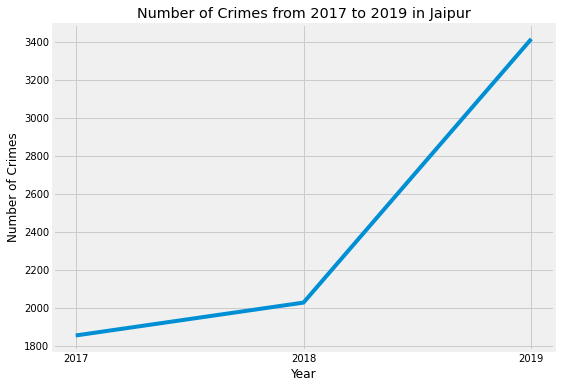

In [199]:
def city_line_plot(city):
    plt.figure(figsize=(8,6))
    temp_tbl = create_temp_city_table(city)
    plt.plot("Year", "Total Crimes", data=temp_tbl)
    plt.xticks(make_array(2017, 2018, 2019))
    plt.title("Number of Crimes from 2017 to 2019 in " + city)
    plt.xlabel("Year")
    plt.ylabel("Number of Crimes");

city_line_plot("Jaipur")

Here, we can see more concretely what we mean. Notice how the sequential variable, `Year`, is plotted on the x-axis, and our other numerical variable, `Number of Crimes` is plotted on the y-axis. Line plots are typically one of the easier visualizations to understand. Above, we see the number of crimes in the city of Jaipur from 2017 to 2019. The increasing line is indicative of the rise in crimes.  

Run the cell below, which will allow you to select which city you want to visualize next. Select any city **but** Delhi. 

In [200]:
city_names = list(cities["City"])

city_widget = widgets.Dropdown(options=city_names, 
                               value=city_names[0])

interact(city_line_plot,
         city=city_widget);

interactive(children=(Dropdown(description='city', options=('Ahmedabad', 'Bengaluru', 'Chennai', 'Coimbatore',…

<div class="alert alert-info">
    <b>Question 2.6</b> What city or cities did you select? Has crime increased or decreased? How does this compare to Jaipur?
</div> 

*Replace this text with your answer*

Now that you have gotten a taste of how line plots look and how to interpret them, we can start looking at the code needed to generate them. To make a scatter plot, we use the `plt.plot()` function. There are many arguments we can specify (color, outline, etc.), but for the purposes of today we will be looking at three main arguments. 
- **1st argument**: The name of the column (variable) we want to visualize in the x-axis. Must be sequential. 
- **2nd argument**: The name of the column (variable) we want to visualize in the y-axis
- **`data=`**: Assigned to the name of the dataset we want to pull information from  

<div class="alert alert-info">
    <b>Question 2.7</b> Use the <code>plt.plot()</code> function to visualize the change in number of crimes in <b> Delhi </b>. Then, assign <code>my_title</code>, <code>x_axis_label</code> and <code>y_axis_label</code> to labels that accurately represent the values visualized.
</div> 

*Hint:* Look at previous code for guidance. 

In [ ]:
plt.figure(figsize=(8,6))

city_of_interest_name = "..." # Fill this out with the name of the city we are interested in 

temp_tbl = create_temp_city_table(city_of_interest_name)

# What is the name of the x-axis?
plt.plot("...", "Total Crimes", data=temp_tbl)
plt.xticks(make_array(2017, 2018, 2019))

my_title = "..."
x_axis_label = "..."
y_axis_label = "..."


plt.title(my_title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label);

<div class="alert alert-info">
    <b>Question 2.8</b> Look at the line plot for number of crimes from 2017-19 in Delhi pictured above. Has crime increased or decreased? How does this compare to Jaipur? How does this compare to the city you chose in Q2.6?  
</div> 

*Replace this text with your answer.*

<div class="alert alert-block alert-success">
<b>Bonus Question 2:</b> Write a function below that create a line plot of the number crimes in 2019 for a given state/union territory. Then, plot the change in number of crimes for <code>Delhi (UT)</code>. 
</div>

*Hint:* You may want to create a function that creates a temporary table. Look at the function `create_temp_city_tbl` defined in the beginning of the section. 

In [ ]:
def state_line_plot(state):
    ...
    ...
    ...
    return

### Conclusion

Congratulations! You've reached the end of the assignment. It may be the case for some of you that this is the first time being introduced to progamming and data science methods. We hope you gained some insight on how to analyze and interpret crime rate data, particularly how to think about these data under sociopolitical contexts. 

### Submitting Your Work 

In [ ]:
# This may take a few seconds 
from IPython.display import display, HTML
!pip install -U notebook-as-pdf -q
!jupyter-nbconvert --to PDFviaHTML india_gender_violence.ipynb
display(HTML("Save this notebook, then click <a href='india_gender_violence.pdf' download>here</a> to open the pdf."))

<a id="resources"></a>

## 6. Data Science Resources at UC Berkeley 

If any assistance is required for this notebook, our peer advisors are here to help! Their drop-in hours are [here](https://data.berkeley.edu/ds-peer-consulting). You can also [email them](ds-peer-consulting@berkeley.edu) to book an appointment if there are any time conflicts.  

If you are interested in data science as a whole, a great course to start with is [Data 8](http://data8.org/fa21/), which is designed for students with no programming or stats experience. For the full list of courses and degree programs, [click here](https://data.berkeley.edu/academics/data-science-undergraduate-studies/data-science-academic-enrichment).

#### Feedback:

Please let us know of your thoughts on this notebook! [Fill out the following survey here.](https://docs.google.com/forms/d/e/1FAIpQLScjlDMT_ddo-yZCTZsm2ZVlK6rrfv5D5KM1fD-B2wp2CS4xgw/viewform) 